In [1]:
from matplotlib import pyplot as plt

In [3]:
a = [1, 4, 8, 16, 32, 64, 128]
b = [0.04778313636779785, 0.06465792655944824, 0.003702402114868164, 0.005709409713745117, 0.008890628814697266, 0.01522064208984375, 0.030358076095581055]

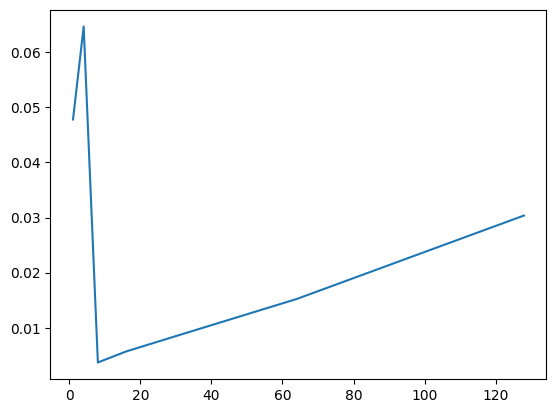

In [4]:
plt.plot(a, b)

In [1]:
import time
import torch
from sae_lens import HookedSAETransformer, SAE

In [2]:
MODEL_ID = 'gpt2'
MODEL_NAME = 'gpt2-small-res-jb'
SAE_ID = 'blocks.10.hook_resid_pre'

In [4]:
sae, _, _ = SAE.from_pretrained(
    release = MODEL_NAME, # see other options in sae_lens/pretrained_saes.yaml
    sae_id = SAE_ID, 
    device='cuda'
)

In [5]:
total_bytes = 0
for p in sae.parameters():
    print(p.shape, p.dtype)
    total_bytes += p.numel() * 4

torch.Size([24576]) torch.float32
torch.Size([24576, 768]) torch.float32
torch.Size([768, 24576]) torch.float32
torch.Size([768]) torch.float32


In [6]:
# print total number of megabytes

print(f"Total number of bytes: {total_bytes / 1024 / 1024:.2f} MB")

Total number of bytes: 144.10 MB


In [17]:
t = torch.rand(32, 1024, 768, device='cuda')

start = time.time()
for i in range(100):
    sae(t)
    # zero the gradient 

print(f"Time taken: {time.time() - start:.2f} s")

Time taken: 23.68 s


In [10]:
t = torch.rand(32, 1024, 768, device='cuda')

start = time.time()
for i in range(100):
    sae(t)
    # zero the gradient 

print(f"Time taken: {time.time() - start:.2f} s")

Time taken: 21.10 s


finished 1
finished 8
finished 16
finished 32
finished 64
finished 128
finished 256
finished 512
finished 1024


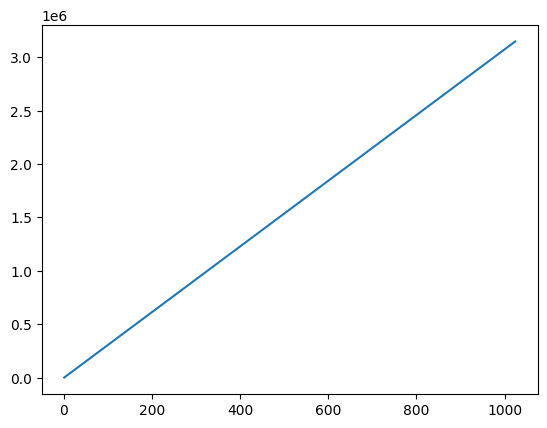

In [8]:
bs =[1, 8, 16, 32, 64, 128, 256, 512, 1024]
file_size = []

for i in bs:
    t = torch.rand(i, 1024, 768)

    torch.save(t, 'example.pt')

    # print the size of the file
    import os
    s = os.path.getsize('example.pt') / 1024
    file_size.append(s)
    print('finished', i)

# plot the file size vs the batch size

import matplotlib.pyplot as plt

plt.plot(bs, file_size)


In [11]:
file_size[1] / 1024

24.00112533569336

In [13]:
t.numel() * 4 / 1024 / 1024 / 1024

3.0